In [37]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

data = pd.read_csv('steel_data.csv')

In [38]:
data.head()  # 데이터 확인

,Unnamed: 0.1,Unnamed: 0,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,0,PB562774,2008-08-01 00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,1,1,PB562775,2008-08-01 00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,2,2,PB562776,2008-08-01 00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,3,3,PB562777,2008-08-01 00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,4,4,PB562778,2008-08-01 00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,...,1140,134,1128,48,314,1128,873,적용,8,1조


In [39]:
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)  #필요없는 데이터 드랍

In [40]:
data.head() 

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01 00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01 00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01 00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01 00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01 00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조


## 전체 불량율

In [6]:
data_bull = data.groupby(['SCALE']).agg(count = ('SCALE','count'))
data_bull  #불량율 = 32.1%

,count
SCALE,
불량,231
양품,489


## 두께 불량유무

In [7]:
data_PT_THK = data.groupby(['SCALE','PT_THK'], as_index = False).agg(count = ('SCALE', 'count'))   
data_PT_THK

,SCALE,PT_THK,count
0,불량,12.05,2
1,불량,12.55,1
2,불량,12.56,1
3,불량,12.80,1
4,불량,13.04,1
...,...,...,...
203,양품,76.91,3
204,양품,80.82,3
205,양품,80.83,1
206,양품,83.32,1


<AxesSubplot:xlabel='data_PT_THK', ylabel='count'>

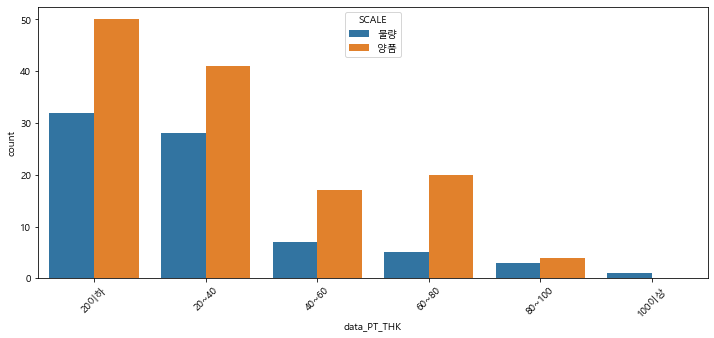

In [8]:
def Total_1(data_PT_THK):
    if data_PT_THK < 20:        
        return '20이하'
    elif data_PT_THK < 40:
        return '20~40'
    elif data_PT_THK < 60:
        return '40~60'
    elif data_PT_THK < 80:
        return '60~80'
    elif data_PT_THK < 100:
        return '80~100'
    else:
        return '100이상'
plt.rc('font', family='Malgun Gothic')    # 한글 폰트수정
plt.figure(figsize = (12, 5))  # 피규어 사이즈 확장 
plt.xticks(rotation=45)  # x라벨이 겹쳐서 글자 회전
data_PT_THK['data_PT_THK'] = data_PT_THK['PT_THK'].apply(Total_1)
data_PT_THK = data_PT_THK.sort_values('data_PT_THK')
sns.countplot(data = data_PT_THK, x='data_PT_THK', hue = 'SCALE',order=['20이하','20~40','40~60','60~80','80~100','100이상'])

## HZ시간 불량유무

In [9]:
data_HZ_TIME = data.groupby(['SCALE','FUR_HZ_TIME'], as_index = False).agg(count = ('SCALE', 'count'))
data_HZ_TIME

,SCALE,FUR_HZ_TIME,count
0,불량,46,1
1,불량,48,1
2,불량,51,1
3,불량,52,1
4,불량,53,1
...,...,...,...
195,양품,239,1
196,양품,245,1
197,양품,249,1
198,양품,308,1


<AxesSubplot:xlabel='data_HZ_TIME', ylabel='count'>

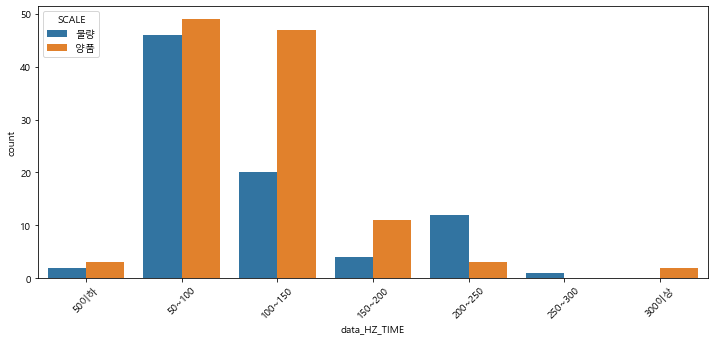

In [10]:
def Total_1(data_HZ_TIME):
    if data_HZ_TIME < 50:        
        return '50이하'
    elif data_HZ_TIME < 100:
        return '50~100'
    elif data_HZ_TIME < 150:
        return '100~150'
    elif data_HZ_TIME < 200:
        return '150~200'
    elif data_HZ_TIME < 250:
        return '200~250'
    elif data_HZ_TIME < 300:
        return '250~300'
    else:
        return '300이상'
plt.rc('font', family='Malgun Gothic')    # 한글 폰트수정
plt.figure(figsize = (12, 5))  # 피규어 사이즈 확장 
plt.xticks(rotation=45)  # x라벨이 겹쳐서 글자 회전
data_HZ_TIME['data_HZ_TIME'] = data_HZ_TIME['FUR_HZ_TIME'].apply(Total_1)
data_HZ_TIME = data_HZ_TIME.sort_values('data_HZ_TIME')
sns.countplot(data = data_HZ_TIME, x='data_HZ_TIME', hue = 'SCALE',order=['50이하','50~100','100~150','150~200','200~250','250~300','300이상'])

## SZ시간 불량유무

In [11]:
data_SZ_TIME = data.groupby(['SCALE','FUR_SZ_TIME'], as_index = False).agg(count = ('SCALE', 'count'))
data_SZ_TIME

,SCALE,FUR_SZ_TIME,count
0,불량,35,1
1,불량,37,1
2,불량,38,1
3,불량,41,1
4,불량,42,1
...,...,...,...
183,양품,231,1
184,양품,238,1
185,양품,242,1
186,양품,246,1


<AxesSubplot:xlabel='data_SZ_TIME', ylabel='count'>

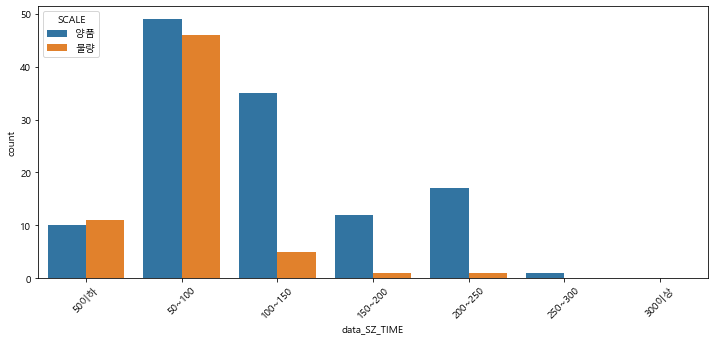

In [12]:
def Total_1(data_SZ_TIME):
    if data_SZ_TIME < 50:        
        return '50이하'
    elif data_SZ_TIME < 100:
        return '50~100'
    elif data_SZ_TIME < 150:
        return '100~150'
    elif data_SZ_TIME < 200:
        return '150~200'
    elif data_SZ_TIME < 250:
        return '200~250'
    elif data_SZ_TIME < 300:
        return '250~300'
    else:
        return '300이상'
plt.rc('font', family='Malgun Gothic')    # 한글 폰트수정
plt.figure(figsize = (12, 5))  # 피규어 사이즈 확장 
plt.xticks(rotation=45)  # x라벨이 겹쳐서 글자 회전
data_SZ_TIME['data_SZ_TIME'] = data_SZ_TIME['FUR_SZ_TIME'].apply(Total_1)
data_SZ_TIME = data_SZ_TIME.sort_values('data_SZ_TIME')
sns.countplot(data = data_SZ_TIME, x='data_SZ_TIME', hue = 'SCALE',order=['50이하','50~100','100~150','150~200','200~250','250~300','300이상'])

## HZ온도 불량유무

In [13]:
data_HZ_TEMP = data.groupby(['SCALE','FUR_HZ_TEMP'], as_index = False).agg(count = ('SCALE', 'count'))
data_HZ_TEMP 

,SCALE,FUR_HZ_TEMP,count
0,불량,1115,2
1,불량,1123,1
2,불량,1124,1
3,불량,1127,1
4,불량,1128,1
...,...,...,...
159,양품,1191,1
160,양품,1192,5
161,양품,1195,2
162,양품,1196,1


<AxesSubplot:xlabel='data_HZ_TEMP', ylabel='count'>

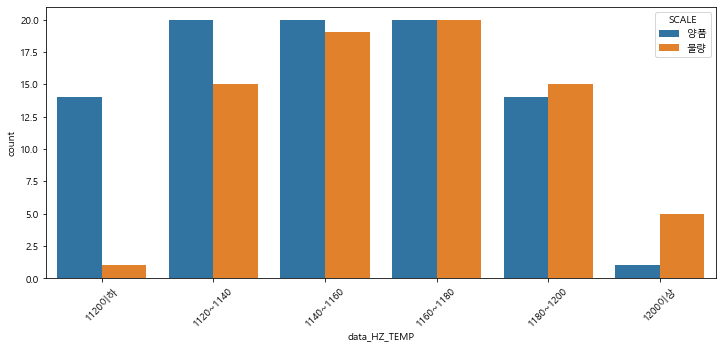

In [14]:
def Total_1(data_HZ_TEMP):
    if data_HZ_TEMP < 1120:        
        return '1120이하'
    elif data_HZ_TEMP < 1140:
        return '1120~1140'
    elif data_HZ_TEMP < 1160:
        return '1140~1160'
    elif data_HZ_TEMP < 1180:
        return '1160~1180'
    elif data_HZ_TEMP < 1200:
        return '1180~1200'
    else:
        return '1200이상'
plt.rc('font', family='Malgun Gothic')    # 한글 폰트수정
plt.figure(figsize = (12, 5))  # 피규어 사이즈 확장 
plt.xticks(rotation=45)  # x라벨이 겹쳐서 글자 회전
data_HZ_TEMP['data_HZ_TEMP'] = data_HZ_TEMP['FUR_HZ_TEMP'].apply(Total_1)
data_HZ_TEMP = data_HZ_TEMP.sort_values('data_HZ_TEMP')
sns.countplot(data = data_HZ_TEMP, x='data_HZ_TEMP', hue = 'SCALE',order=['1120이하','1120~1140','1140~1160','1160~1180','1180~1200','1200이상'])

# SZ온도 불량유무

In [15]:
data_SZ_TEMP = data.groupby(['SCALE','FUR_SZ_TEMP'], as_index = False).agg(count = ('SCALE', 'count'))
data_SZ_TEMP 

,SCALE,FUR_SZ_TEMP,count
0,불량,1119,2
1,불량,1121,1
2,불량,1122,1
3,불량,1123,1
4,불량,1124,2
...,...,...,...
107,양품,1170,9
108,양품,1172,6
109,양품,1173,7
110,양품,1174,6


<AxesSubplot:xlabel='data_SZ_TEMP', ylabel='count'>

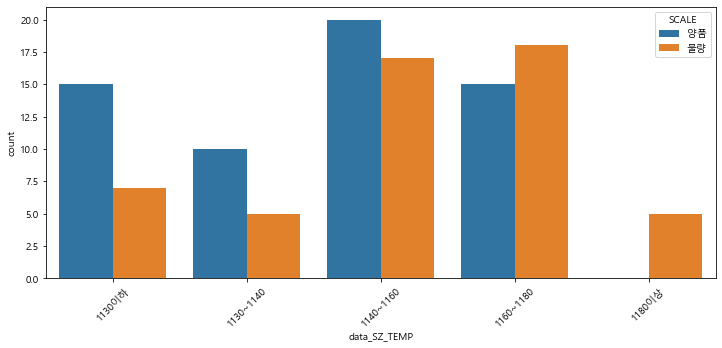

In [16]:
def Total_1(data_SZ_TEMP):
    if data_SZ_TEMP < 1130:        
        return '1130이하'
    elif data_SZ_TEMP < 1140:
        return '1130~1140'
    elif data_SZ_TEMP < 1160:
        return '1140~1160'
    elif data_SZ_TEMP < 1180:
        return '1160~1180'
    else:
        return '1180이상'
plt.rc('font', family='Malgun Gothic')    # 한글 폰트수정
plt.figure(figsize = (12, 5))  # 피규어 사이즈 확장 
plt.xticks(rotation=45)  # x라벨이 겹쳐서 글자 회전
data_SZ_TEMP['data_SZ_TEMP'] = data_SZ_TEMP['FUR_SZ_TEMP'].apply(Total_1)
data_SZ_TEMP = data_SZ_TEMP.sort_values('data_SZ_TEMP')
sns.countplot(data = data_SZ_TEMP, x='data_SZ_TEMP', hue = 'SCALE',order=['1130이하','1130~1140','1140~1160','1160~1180','1180이상'])

## HSB 불량유무

In [17]:
data_spec = data.groupby(['SCALE','HSB'], as_index = False).agg(count = ('SCALE', 'count'))
data_spec  # HSB적용 불량율 = 28.8%

,SCALE,HSB,count
0,불량,미적용,33
1,불량,적용,198
2,양품,적용,489


<AxesSubplot:xlabel='SCALE', ylabel='count'>

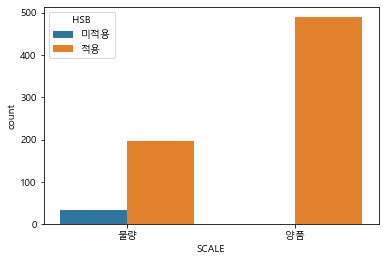

In [18]:
sns.barplot(data=data_spec, x='SCALE', y='count', hue='HSB')

## ROLLING_DESCALING작업횟수 불량유무

In [19]:
data_roll = data.groupby(['SCALE','ROLLING_DESCALING'], as_index = False).agg(count = ('SCALE', 'count'))
data_roll

,SCALE,ROLLING_DESCALING,count
0,불량,5,5
1,불량,6,26
2,불량,7,15
3,불량,8,99
4,불량,9,20
5,불량,10,66
6,양품,6,150
7,양품,8,109
8,양품,10,230


<AxesSubplot:xlabel='SCALE', ylabel='count'>

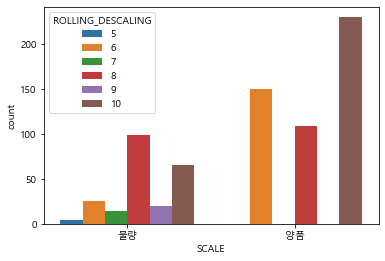

In [20]:
sns.barplot(data=data_roll, x='SCALE', y='count', hue='ROLLING_DESCALING') # 홀수횟수엔 100프로불량

## 롤링온도 불량유무

In [21]:
data_roll2 = data.groupby(['SCALE','ROLLING_TEMP_T5'], as_index = False).agg(count = ('SCALE', 'count'))
data_roll2

,SCALE,ROLLING_TEMP_T5,count
0,불량,811,1
1,불량,812,1
2,불량,818,1
3,불량,820,1
4,불량,846,1
...,...,...,...
280,양품,996,3
281,양품,997,4
282,양품,998,4
283,양품,999,4


<AxesSubplot:xlabel='ROLLING_TEMP', ylabel='count'>

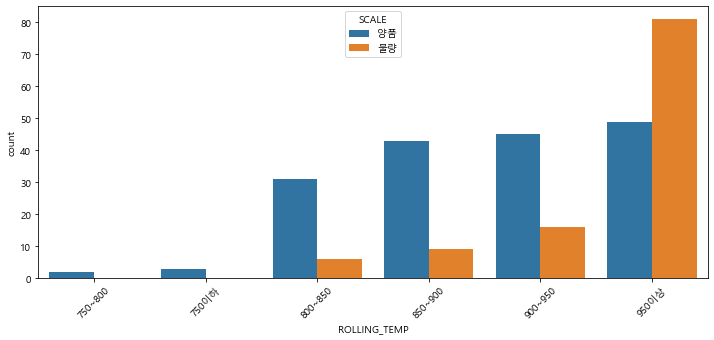

In [22]:
def Total_1(data_roll2):
    
    if data_roll2 < 750:        
        return '750이하'
    elif data_roll2 < 800:
        return '750~800'
    elif data_roll2 < 850:
        return '800~850'
    elif data_roll2 < 900:
        return '850~900'
    elif data_roll2 < 950:
        return '900~950'
    else:
        return '950이상'
plt.rc('font', family='Malgun Gothic')    # 한글 폰트수정
plt.figure(figsize = (12, 5))  # 피규어 사이즈 확장 
plt.xticks(rotation=45)  # x라벨이 겹쳐서 글자 회전
data_roll2['ROLLING_TEMP'] = data_roll2['ROLLING_TEMP_T5'].apply(Total_1)
sns.countplot(data = data_roll2.sort_values(by = 'ROLLING_TEMP'), x='ROLLING_TEMP', hue = 'SCALE')

# 롤링온도는 950도이상일떄 불량률이 높아진다

## 온도,시간 군집처리

In [23]:
steel_data_clustering = data[['FUR_HZ_TEMP','FUR_HZ_TIME','FUR_SZ_TEMP','FUR_SZ_TIME','FUR_TIME','FUR_EXTEMP']]
steel_data_clustering.head()

,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP
0,1144,116,1133,59,282,1133
1,1144,122,1135,53,283,1135
2,1129,116,1121,55,282,1121
3,1152,125,1127,68,316,1127
4,1140,134,1128,48,314,1128


In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# 스케일 변환
scaler = MinMaxScaler()
steel_data_clustering_std = scaler.fit_transform(steel_data_clustering)

# 군집
kmeans = KMeans(n_clusters = 6)
kmeans.fit(steel_data_clustering_std)

# 생성 된 클러스터를 데이터 프레임에 넣습니다.
clusters = kmeans.labels_
steel_data_clustering.copy().loc[:, 'cluster'] = clusters

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #2차원으로 변환하라는 코딩
pca.fit(steel_data_clustering_std)

PCA(n_components=2)

In [26]:
pca_df = pd.DataFrame(pca.transform(steel_data_clustering_std), columns = ['X','Y'])
pca_df.loc[:,'cluster'] = clusters
pca_df.head(1)

,X,Y,cluster
0,-0.256937,-0.213167,4


<AxesSubplot:xlabel='X', ylabel='Y'>

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


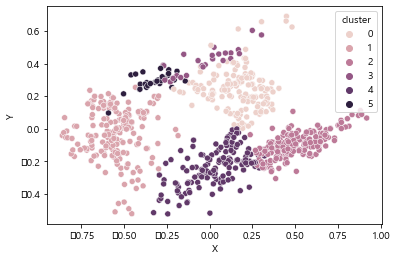

In [27]:
import seaborn as sns
sns.scatterplot(data = pca_df, x = 'X', y = 'Y', hue = 'cluster')

In [28]:
data.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01 00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01 00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01 00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01 00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01 00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조


In [29]:
data['불량'] = data['SCALE'] == '불량'
data

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,불량
0,PB562774,2008-08-01 00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,116,1133,59,282,1133,934,적용,8,2조,False
1,PB562775,2008-08-01 00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,122,1135,53,283,1135,937,적용,8,2조,False
2,PB562776,2008-08-01 00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,116,1121,55,282,1121,889,적용,8,3조,False
3,PB562777,2008-08-01 00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,125,1127,68,316,1127,885,적용,8,3조,False
4,PB562778,2008-08-01 00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,134,1128,48,314,1128,873,적용,8,1조,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2008-08-02 13:35:36,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,...,72,1164,62,245,1164,1005,적용,8,2조,True
716,PB563503,2008-08-02 13:35:02,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,...,61,1169,61,238,1169,947,적용,10,1조,False
717,PB563504,2008-08-02 14:40:00,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,...,65,1163,77,247,1163,948,적용,10,4조,False
718,PB563505,2008-08-02 13:35:19,양품,LR-A,C0,15.59,3363,48740,80240,3호기,...,86,1163,45,243,1163,940,적용,10,2조,False


In [30]:
data_PT_THK

,SCALE,PT_THK,count,data_PT_THK
75,불량,100.34,2,100이상
48,불량,25.12,4,20~40
51,불량,26.24,4,20~40
50,불량,25.19,1,20~40
49,불량,25.18,2,20~40
...,...,...,...,...
74,불량,83.32,1,80~100
206,양품,83.32,1,80~100
204,양품,80.82,3,80~100
205,양품,80.83,1,80~100


<AxesSubplot:xlabel='SCALE', ylabel='PT_THK'>

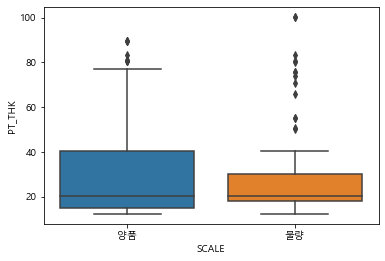

In [31]:
sns.boxplot(data = data, y ='PT_THK', x = 'SCALE')


In [32]:
data_bull = data.groupby(['SCALE']).agg(count = ('SCALE','count'))
data_bull  #불량율 = 32.1%

,count
SCALE,
불량,231
양품,489


<AxesSubplot:xlabel='SCALE', ylabel='count'>

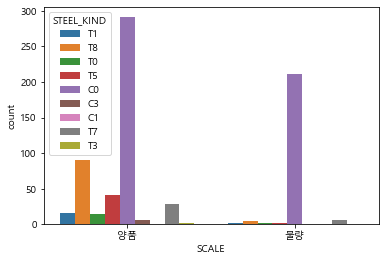

In [33]:
from matplotlib import font_manager, rc
f_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)
sns.countplot(data = data, x= 'SCALE',hue = 'STEEL_KIND')#종류별 불량률

In [94]:
def df1(data):
    if data == '양품':
        return 1
    else:
        return 0    
data['SCALE_1'] = data['SCALE'].apply(df1)
data

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,SCALE_1
0,PB562774,2008-08-01 00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,116,1133,59,282,1133,934,적용,8,2조,1
1,PB562775,2008-08-01 00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,122,1135,53,283,1135,937,적용,8,2조,1
2,PB562776,2008-08-01 00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,116,1121,55,282,1121,889,적용,8,3조,1
3,PB562777,2008-08-01 00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,125,1127,68,316,1127,885,적용,8,3조,1
4,PB562778,2008-08-01 00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,134,1128,48,314,1128,873,적용,8,1조,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2008-08-02 13:35:36,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,...,72,1164,62,245,1164,1005,적용,8,2조,0
716,PB563503,2008-08-02 13:35:02,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,...,61,1169,61,238,1169,947,적용,10,1조,1
717,PB563504,2008-08-02 14:40:00,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,...,65,1163,77,247,1163,948,적용,10,4조,1
718,PB563505,2008-08-02 13:35:19,양품,LR-A,C0,15.59,3363,48740,80240,3호기,...,86,1163,45,243,1163,940,적용,10,2조,1


In [95]:
data_1 = data[['FUR_HZ_TEMP','FUR_HZ_TIME','FUR_SZ_TEMP','FUR_SZ_TIME','FUR_TIME','FUR_EXTEMP','ROLLING_TEMP_T5','SCALE_1']]
data_1

,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,SCALE_1
0,1144,116,1133,59,282,1133,934,1
1,1144,122,1135,53,283,1135,937,1
2,1129,116,1121,55,282,1121,889,1
3,1152,125,1127,68,316,1127,885,1
4,1140,134,1128,48,314,1128,873,1
...,...,...,...,...,...,...,...,...
715,1172,72,1164,62,245,1164,1005,0
716,1150,61,1169,61,238,1169,947,1
717,1169,65,1163,77,247,1163,948,1
718,1179,86,1163,45,243,1163,940,1


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

df1 = data_1[data_1['SCALE_1'] == 1]
df2 = data_1[data_1['SCALE_1'] == 0]
concat_data = pd.concat([df1, df2])

X = concat_data.drop(['SCALE_1'], axis = 1)
Y = concat_data['SCALE_1'].ravel()

X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y, test_size = 0.3, random_state = 0)

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

train_accuracy = model.score(X_train, Y_train)
test_accuracy = model.score(X_test, Y_test)
print(f'훈련 정확도 : {train_accuracy}')
print(f'테스트 정확도 : {test_accuracy}')

훈련 정확도 : 1.0
테스트 정확도 : 0.8333333333333334


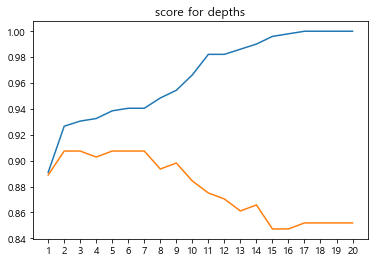

In [132]:
train_score=[]
test_score=[]
for i in range(1,21):
    
    model=DecisionTreeClassifier(max_depth=i,random_state=4)
    model.fit(X_train,Y_train)
    train_score.append(model.score(X_train,Y_train))
    test_score.append(model.score(X_test,Y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,21),train_score)
plt.plot(range(1,21),test_score)
plt.xticks(range(1,21))
plt.show()

In [136]:
model_none_overfitting = DecisionTreeClassifier(max_depth = 2)
model_none_overfitting.fit(X_train, Y_train)
train_accuracy = model_none_overfitting.score(X_train, Y_train)
test_accuracy = model_none_overfitting.score(X_test, Y_test)
print(f'훈련 정확도 : {train_accuracy}')
print(f'테스트 정확도 : {test_accuracy}')

훈련 정확도 : 0.9265873015873016
테스트 정확도 : 0.9074074074074074


In [137]:
import matplotlib.pyplot as plt
import numpy as np

importance = model_none_overfitting.feature_importances_
importance


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.18382234, 0.81617766])

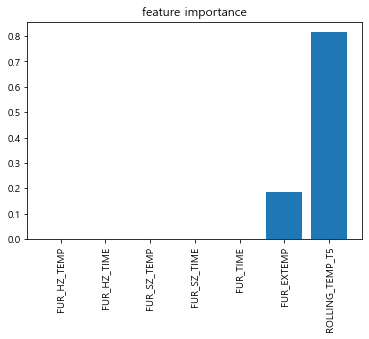

In [138]:
plt.figure()
plt.title('feature importance')
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X.columns, rotation = 90)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_2976\3425698141.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


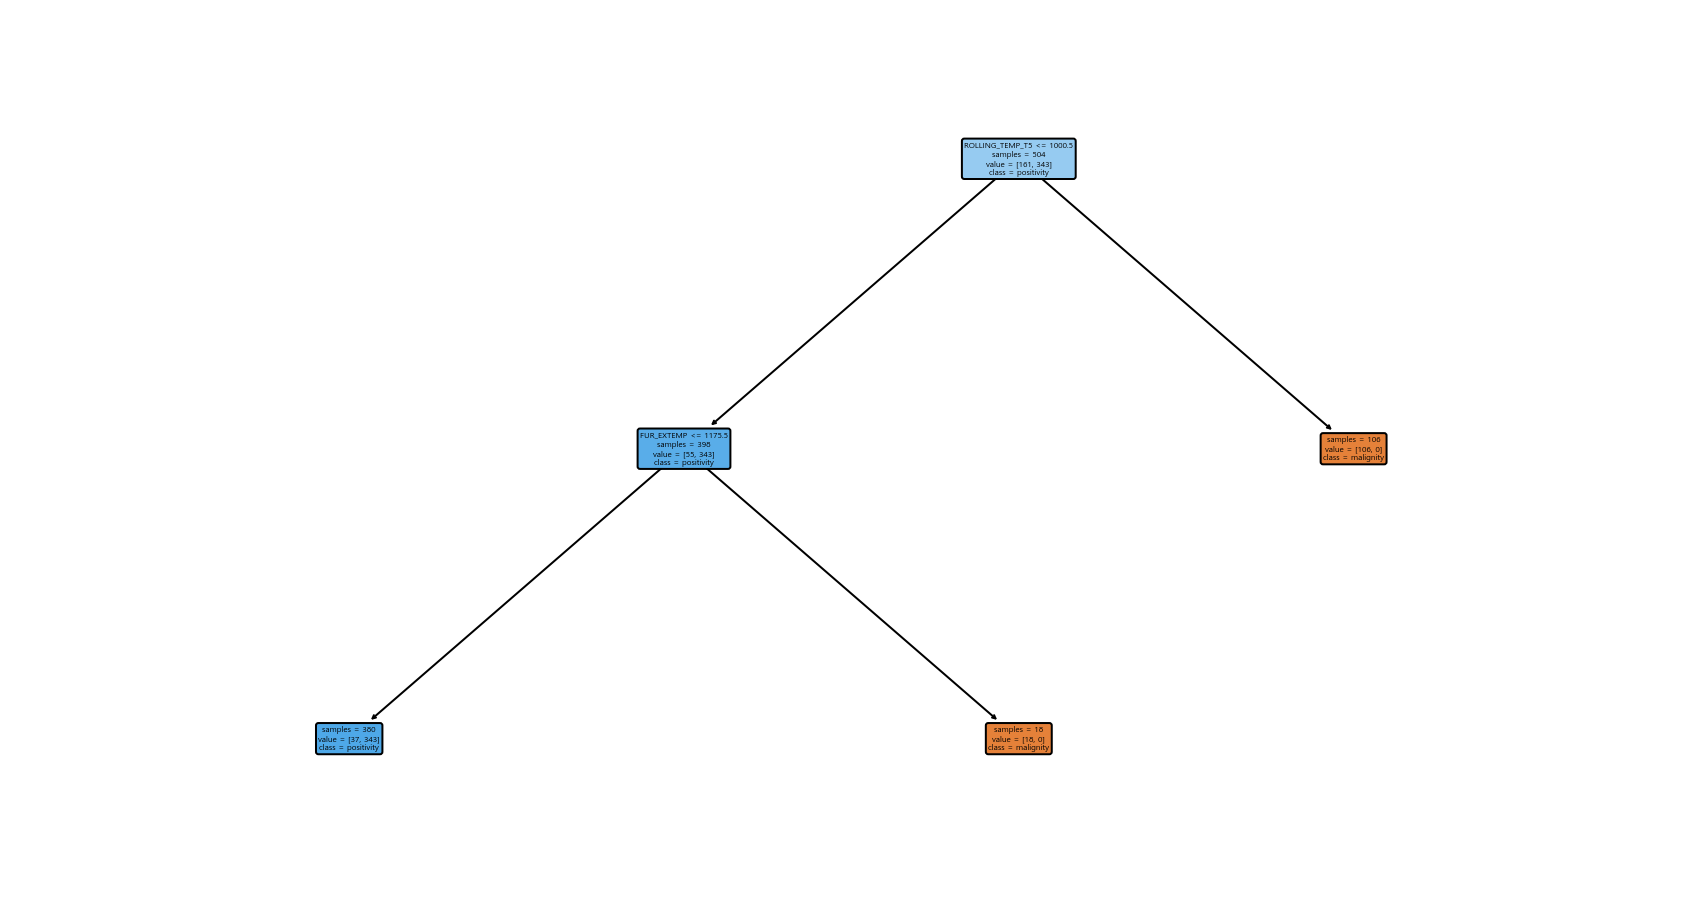

In [139]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
plt.rcParams['figure.figsize'] = [15,8]

plot_tree(model_none_overfitting, class_names=["malignity", "positivity"],
          feature_names=model_none_overfitting.feature_names_in_,
         impurity=False, filled=True, rounded=True, fontsize=4)

plt.show()

In [140]:
model_none_overfitting.feature_names_in_

array(['FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME',
       'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5'], dtype=object)

In [144]:
input_data.reshape(-1).shape

(8,)

In [146]:
import numpy as np
input_data = np.array([1144,116,1133,59,282,1133,934]).reshape(1, -1)
model_none_overfitting.predict(input_data)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [198]:
x = data[['FUR_HZ_TEMP','FUR_HZ_TIME','FUR_SZ_TEMP','FUR_SZ_TIME','FUR_TIME','FUR_EXTEMP','ROLLING_TEMP_T5']]
y = data['SCALE']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [199]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(x_train)
x_train_std = std_scale.transform(x_train)
x_test_std = std_scale.transform(x_test)
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth = 10, random_state = 0)
clf_rf.fit(x_train_std, y_train)
pred_rf =clf_rf.predict(x_test_std)

In [200]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,pred_rf)
print(accuracy)

0.9222222222222223


In [201]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,pred_rf)
print(conf_matrix)

[[ 40  14]
 [  0 126]]


In [202]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, pred_rf)
print(class_report)

              precision    recall  f1-score   support

          불량       1.00      0.74      0.85        54
          양품       0.90      1.00      0.95       126

    accuracy                           0.92       180
   macro avg       0.95      0.87      0.90       180
weighted avg       0.93      0.92      0.92       180



In [203]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

In [207]:
clf_rf = RandomForestClassifier(max_depth = 2, n_estimators = 100)
clf_rf.fit(x_train_std,y_train)

RandomForestClassifier(max_depth=2)

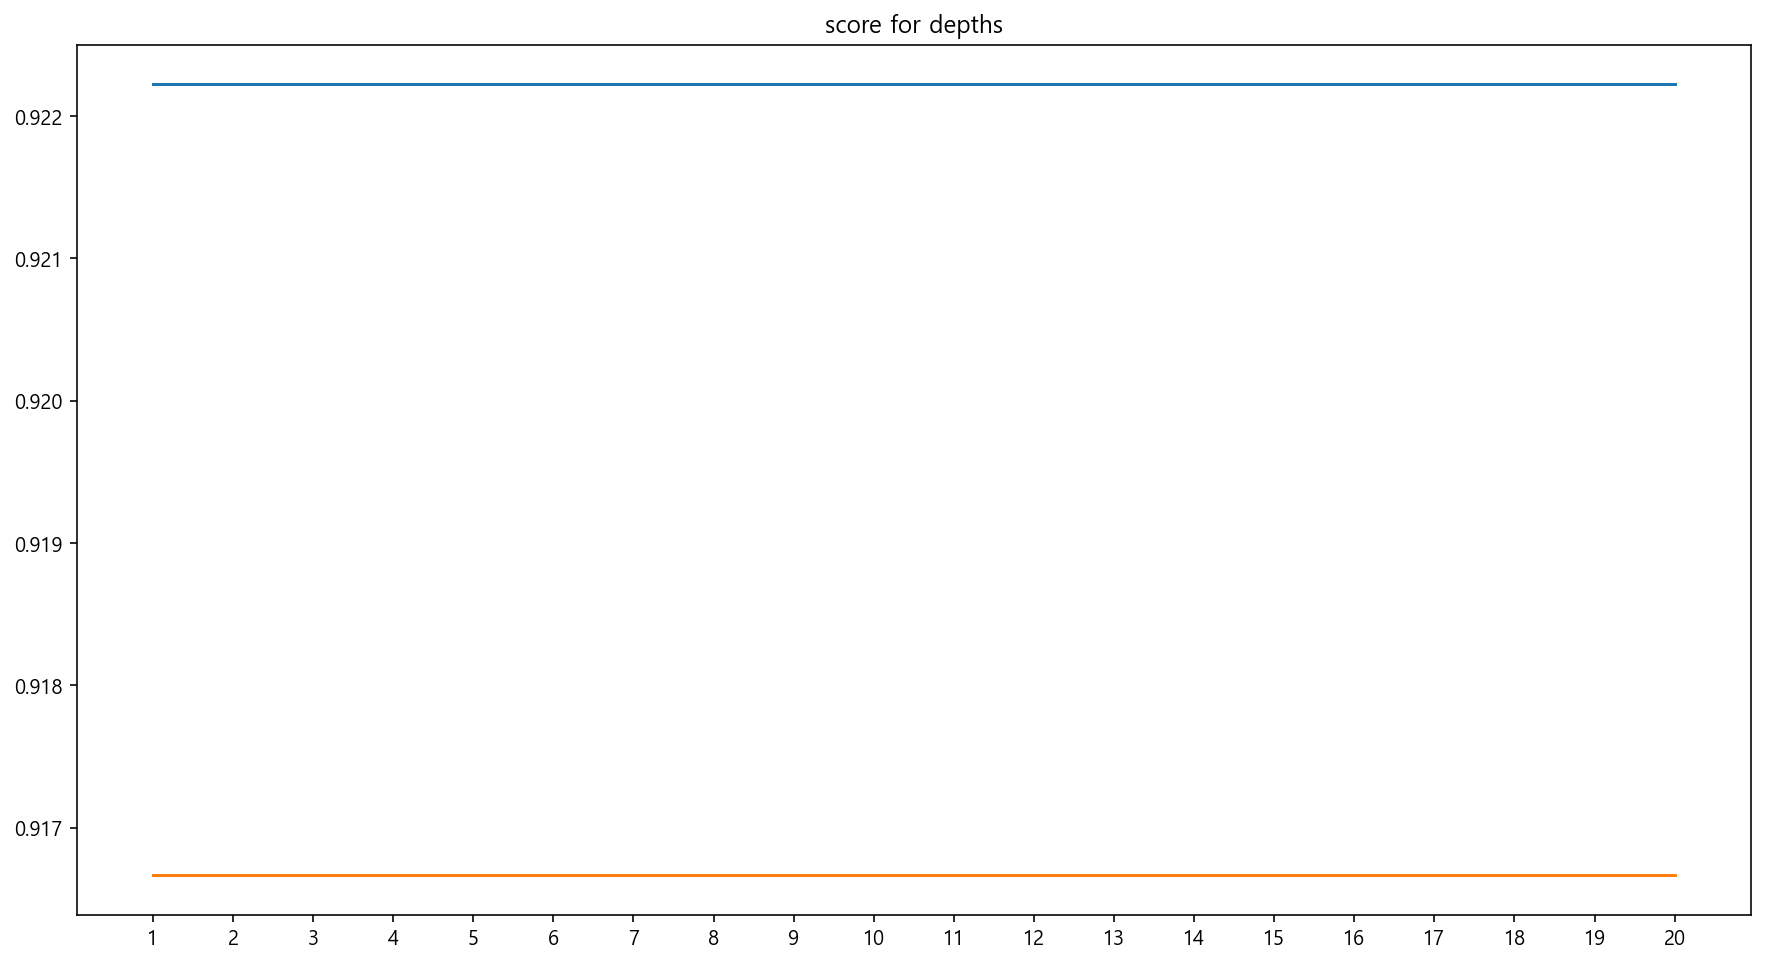

In [213]:
train_score=[]
test_score=[]
for i in range(1,21):
    model=RandomForestClassifier(max_depth=3,random_state=4)
    model.fit(x_train,y_train)
    train_score.append(model.score(x_train,y_train))
    test_score.append(model.score(x_test,y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,21),train_score)
plt.plot(range(1,21),test_score)
plt.xticks(range(1,21))
plt.show()

In [214]:
train_accuracy = model.score(x_train, y_train)
test_accuracy = model.score(x_test, y_test)
print(f'훈련 정확도는 : {train_accuracy}, 테스트 정확도는 {test_accuracy} 입니다.')

훈련 정확도는 : 0.9222222222222223, 테스트 정확도는 0.9166666666666666 입니다.
